# Importing Libraries

In [61]:
import warnings
warnings.filterwarnings("ignore")
from getMatchData import get_match_data
import numpy as np
import pandas as pd
import getPlayersData as gpd
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data

In [30]:
match_data = get_match_data()

Getting data from yesterdays existing file


In [31]:
match_data.tail()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
118315,ESPORTSTMNT04_2470857,complete,NaN,LCK CL,2022,Summer,0,2022-08-11 05:52:31,NaN,12.14,...,141.0,291.0,363.0,6.0,1.0,0.0,0.0,1.0,0.0,1.0
118316,ESPORTSTMNT04_2470857,complete,NaN,LCK CL,2022,Summer,0,2022-08-11 05:52:31,NaN,12.14,...,146.0,-1953.0,-820.0,-16.0,0.0,1.0,2.0,2.0,0.0,0.0
118317,ESPORTSTMNT04_2470857,complete,NaN,LCK CL,2022,Summer,0,2022-08-11 05:52:31,NaN,12.14,...,28.0,72.0,536.0,-3.0,1.0,1.0,0.0,0.0,2.0,1.0
118318,ESPORTSTMNT04_2470857,complete,NaN,LCK CL,2022,Summer,0,2022-08-11 05:52:31,NaN,12.14,...,511.0,3148.0,1229.0,26.0,5.0,5.0,3.0,3.0,3.0,5.0
118319,ESPORTSTMNT04_2470857,complete,NaN,LCK CL,2022,Summer,0,2022-08-11 05:52:31,NaN,12.14,...,537.0,-3148.0,-1229.0,-26.0,3.0,3.0,5.0,5.0,5.0,3.0


In [32]:
match_data[["gameid", "teamid", "playerid", "position"]].values

array([['ESPORTSTMNT01_2690210',
        'oe:team:68911b3329146587617ab2973106e23',
        'oe:player:38e0af7278d6769d0c81d7c4b47ac1e', 'top'],
       ['ESPORTSTMNT01_2690210',
        'oe:team:68911b3329146587617ab2973106e23',
        'oe:player:637ed20b1e41be1c51bd1a4cb211357', 'jng'],
       ['ESPORTSTMNT01_2690210',
        'oe:team:68911b3329146587617ab2973106e23',
        'oe:player:d1ae0e2f9f3ac1e0e0cdcb86504ca77', 'mid'],
       ...,
       ['ESPORTSTMNT04_2470857',
        'oe:team:5380cdbc2ad2b8082624f48f99f6672',
        'oe:player:605821ebcf6a2e53f03ec6e8e463d1b', 'sup'],
       ['ESPORTSTMNT04_2470857',
        'oe:team:6dcacec00a6ba7576c5ab7f30c995cd', nan, 'team'],
       ['ESPORTSTMNT04_2470857',
        'oe:team:5380cdbc2ad2b8082624f48f99f6672', nan, 'team']],
      dtype=object)

In [33]:
def invalid_games_checker(invalid_str="NA"):
    
    # Check if "NA" is present
    flag = False
    for element in match_data[["gameid", "teamid", "playerid", "position"]].values:
        for item in element:
            if not isinstance(item, float):
                if invalid_str in item:
                    flag = True
                    if invalid_str:
                        pprint(f"Has {invalid_str}")
                    else:
                        pprint("Has empty string")
                    break
        if flag:
            break

In [34]:
# check NA
invalid_games_checker(invalid_str="NA")

# check empty string
invalid_games_checker(invalid_str="")

# check nan
invalid_games_checker(invalid_str="nan")

# check null
invalid_games_checker(invalid_str="null")



'Has NA'
'Has empty string'


In [35]:
match_data.shape

(118320, 123)

# Cleaning and formatting data

In [36]:
invalid_game_ids = []

# removing the invalid game data for invalid game ids
for gid in match_data.gameid.values:
    if not isinstance(gid, float):
        if "NA" in gid:
            invalid_game_ids.append(gid)

match_data = match_data[~match_data["gameid"].isin(invalid_game_ids)].copy()

In [37]:
match_data.shape

(112464, 123)

In [38]:
# First removing the data that has empty, nan or null string
format_dict = {
    "": np.nan, 
    "nan": np.nan, 
    "null":np.nan
}

# convert all to str
match_data["gameid"] = match_data["gameid"].str.strip()
match_data["teamid"] = match_data["teamid"].str.strip()
match_data["playerid"] = match_data["playerid"].str.strip()

# replace the invalid values to np.nan
# https://sparkbyexamples.com/pandas/pandas-remap-values-in-column-with-a-dictionary-dict/#:~:text=Using%20Pandas%20DataFrame.-,replace(),regular%20expressions%20for%20regex%20substitutions.
match_data = match_data.replace({
    "gameid": format_dict,
    "teamid": format_dict,
    "playerid": format_dict,
    "position": format_dict
})

In [39]:
match_data.shape

(112464, 123)

In [40]:
# Drop nan value
match_data = match_data[match_data.gameid.notna()]
match_data = match_data[match_data.position.notna()]

In [41]:
match_data.shape

(112440, 123)

In [42]:
# Drop duplicates if any
match_data = match_data.drop_duplicates()

In [43]:
match_data.shape

(112440, 123)

- There are no duplicates

# Separating players data from match data

In [44]:
# look into the dataframe for features
player_data = match_data[match_data["position"] != "team"]
player_data.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1.0,12.01,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1.0,12.01,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1.0,12.01,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1.0,12.01,...,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1.0,12.01,...,21.0,443.0,-497.0,7.0,1.0,2.0,2.0,0.0,6.0,2.0


In [45]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93700 entries, 0 to 118317
Columns: 123 entries, gameid to opp_deathsat15
dtypes: float64(94), int64(11), object(18)
memory usage: 88.6+ MB


In [46]:
player_data.date.values
pprint(type(player_data.date.values[0]))

<class 'str'>


In [47]:
# Format date according to datetime
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
# https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/
player_data = player_data.astype({"date": "datetime64"})

In [48]:
pprint(type(player_data.date.values[0]))

<class 'numpy.datetime64'>


# Downloading the full players data

In [49]:
gpd.players_data_to_csv(player_data)

# Player Data Cleaning

# Get all the features of players data

In [50]:
player_data.columns

Index(['gameid', 'datacompleteness', 'url', 'league', 'year', 'split',
       'playoffs', 'date', 'game', 'patch',
       ...
       'opp_csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15',
       'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15',
       'opp_deathsat15'],
      dtype='object', length=123)

- There are total 123 features but to figure out which features to remove and which features to keep is still in blur
- First look at the CSV file and see if we can remove any feature

In [53]:
player_data_copy = player_data.copy()

## Remove rows where datacompleteness is partial

In [54]:
player_data_copy.datacompleteness.value_counts()

complete    78640
partial     15060
Name: datacompleteness, dtype: int64

- There are 15060 entries that has partial data
- So we take only the complete data

In [55]:
player_data_copy = player_data_copy[player_data_copy.datacompleteness == "complete"]

In [56]:
pprint(player_data.shape)
pprint(player_data_copy.shape)

(93700, 123)
(78640, 123)


## Drop Multiple columns

In [57]:
# dropped column names
dropped_features = [
    "datacompleteness", "url", "firstdragon", "dragons", "opp_dragons", "elementaldrakes",
    "opp_elementaldrakes", "infernals", "mountains", "clouds", "oceans", "chemtechs", "hextechs",
    "dragons (type unknown)", "elders", "opp_elders", "firstherald", "heralds",
    "opp_heralds", "firstbaron", "firsttower", "towers", "opp_towers", "firstmidtower",
    "firsttothreetowers", "turretplates", "opp_turretplates"
]
len(dropped_features)

27

In [58]:
player_data_copy = player_data_copy.drop(dropped_features, axis=1)

In [59]:
player_data_copy.shape

(78640, 96)

- There are 96 features remaining out of which some are important for keeping the data in neo4j database like player name and other such things

In [60]:
player_data_copy.head()

,gameid,league,year,split,playoffs,date,game,patch,participantid,side,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1.0,12.01,1,Blue,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1.0,12.01,2,Blue,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1.0,12.01,3,Blue,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1.0,12.01,4,Blue,...,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1.0,12.01,5,Blue,...,21.0,443.0,-497.0,7.0,1.0,2.0,2.0,0.0,6.0,2.0


# Correlation matrix

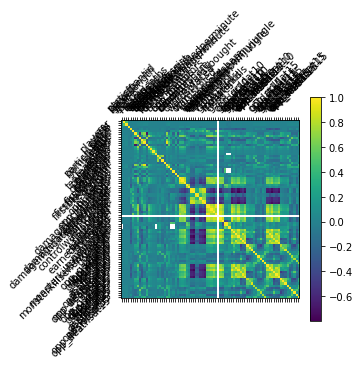

In [64]:
# Correlation matrix
plt.matshow(player_data_copy.corr())
continuous_features = player_data_copy.describe().columns
plt.xticks(range(len(continuous_features)), continuous_features, rotation="45")
plt.yticks(range(len(continuous_features)), continuous_features, rotation="45")
plt.colorbar()
plt.show()


- As you can see plotting directly the correlation cannot solve anything, What we can do is plot the correlation plot without the column names

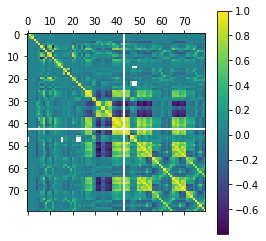

In [65]:
# Correlation matrix
plt.matshow(player_data_copy.corr())
# continuous_features = player_data_copy.describe().columns
# plt.xticks(range(len(continuous_features)), continuous_features, rotation="45")
# plt.yticks(range(len(continuous_features)), continuous_features, rotation="45")
plt.colorbar()
plt.show()

- From this we can infer that where the value is near 1 that has the most correlation

## Lets first look at each column and different values for each column with a histogram

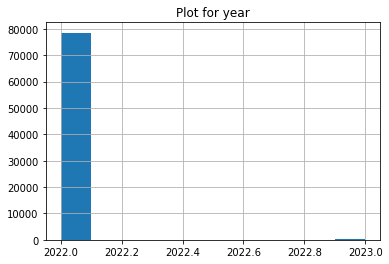

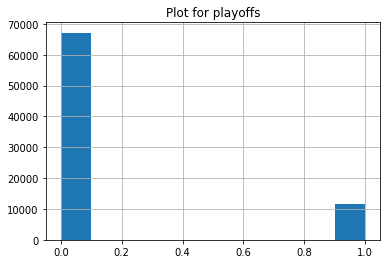

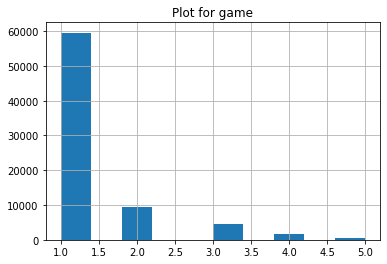

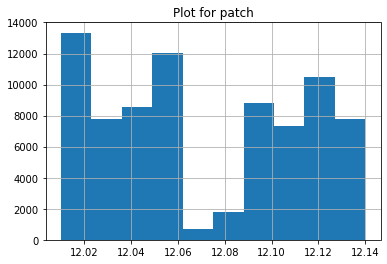

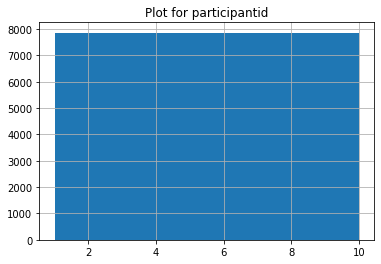

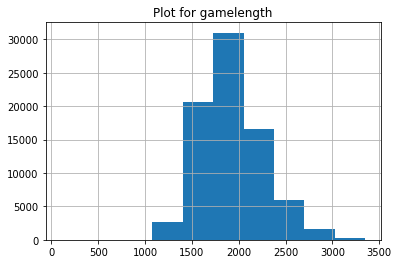

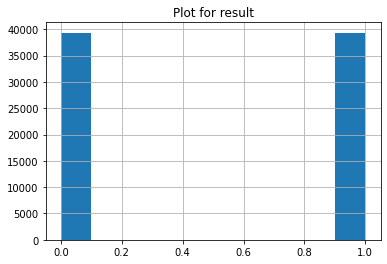

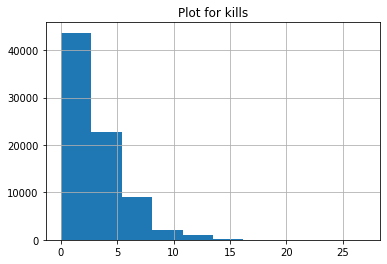

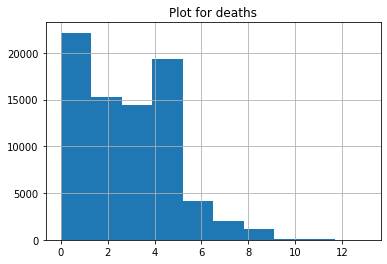

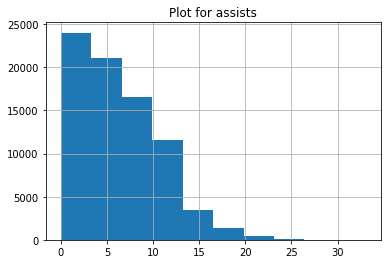

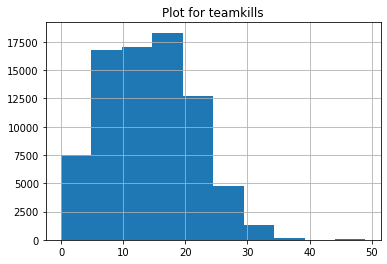

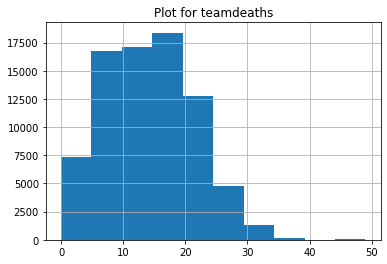

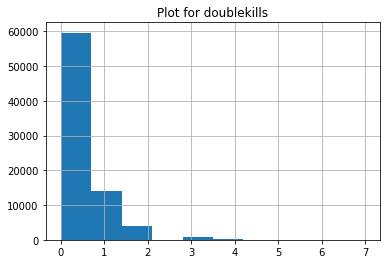

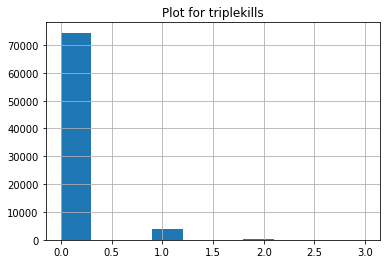

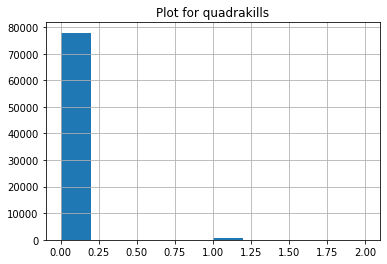

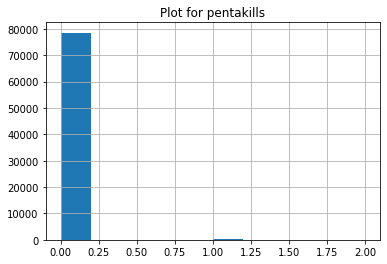

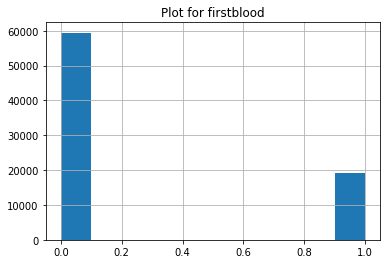

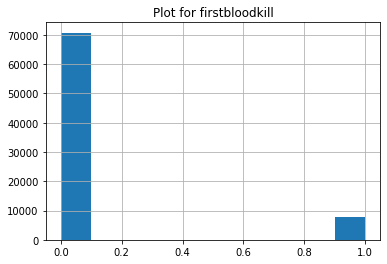

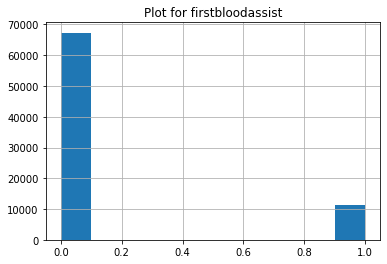

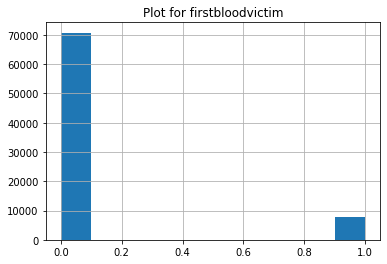

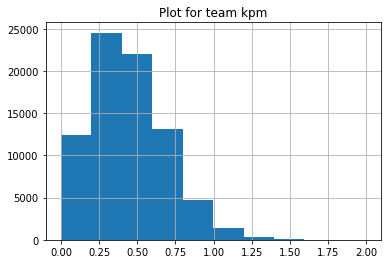

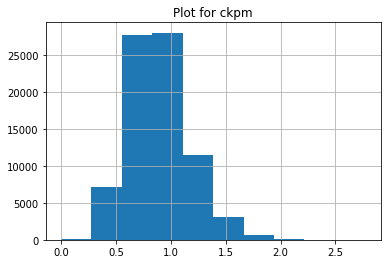

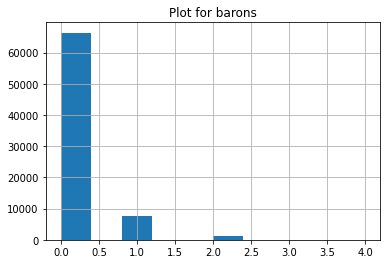

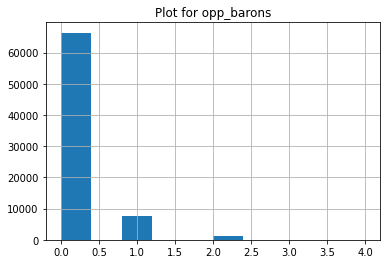

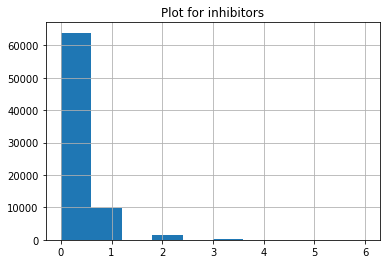

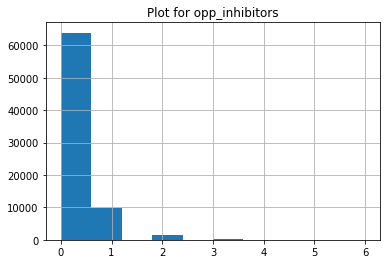

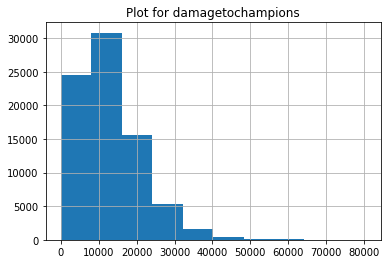

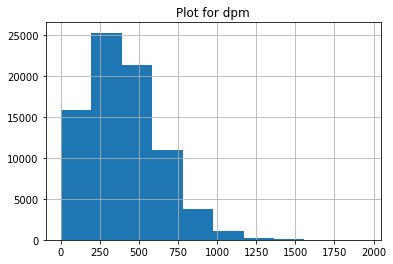

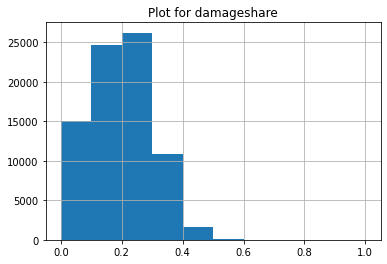

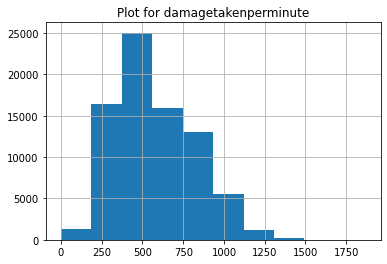

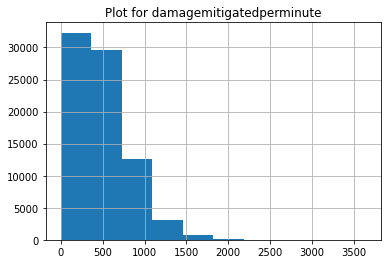

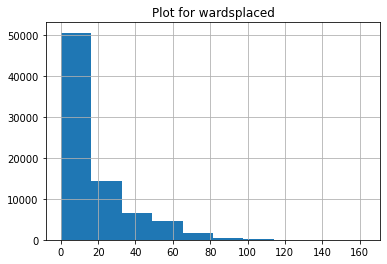

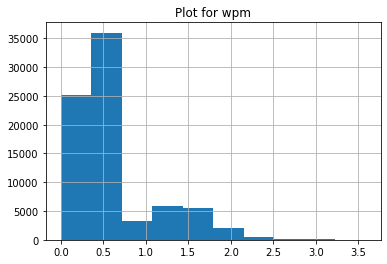

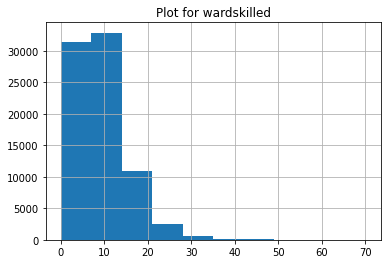

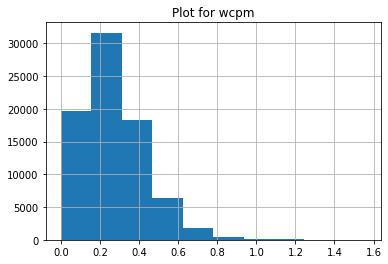

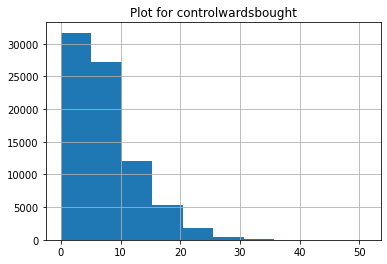

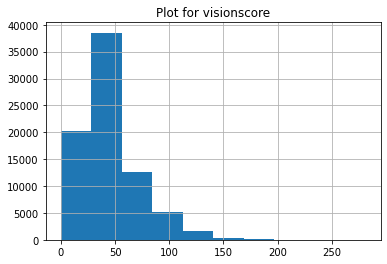

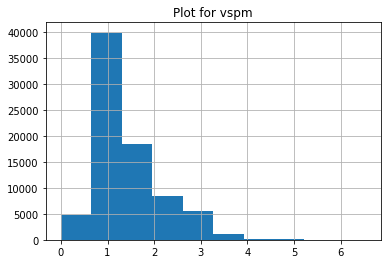

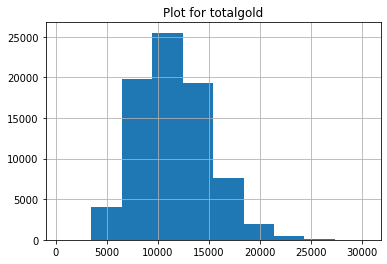

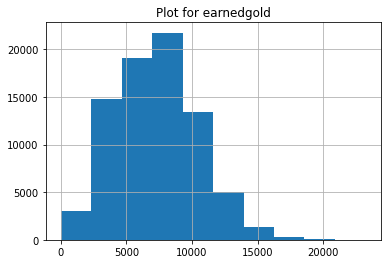

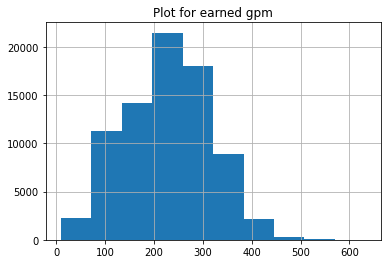

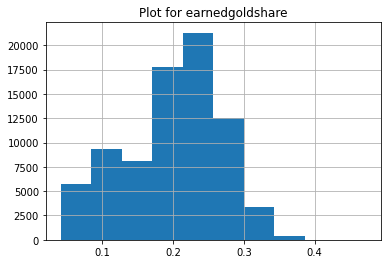

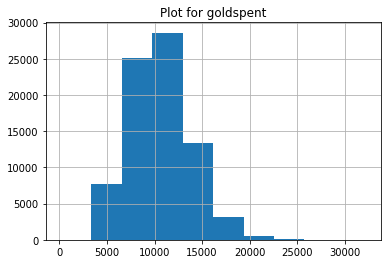

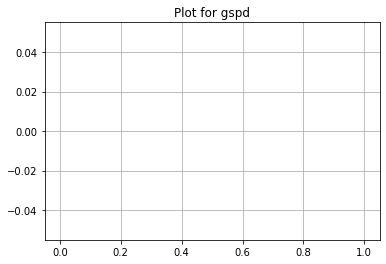

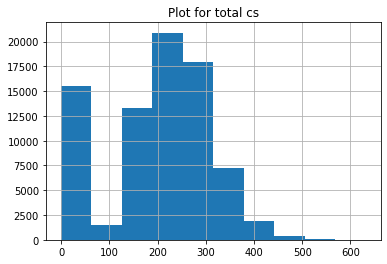

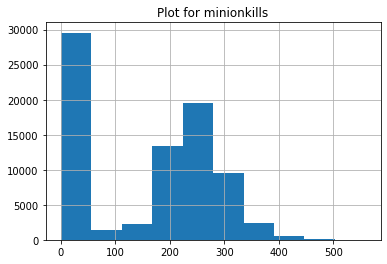

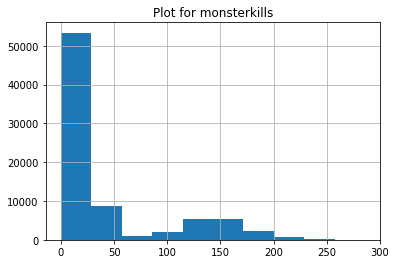

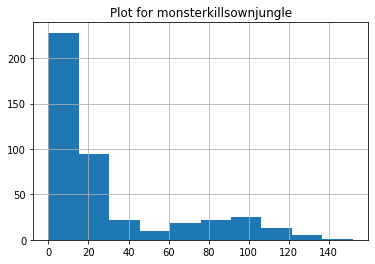

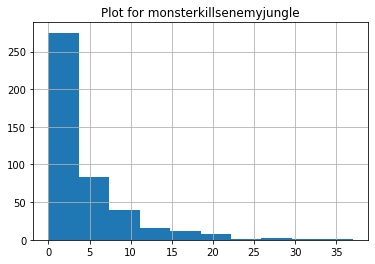

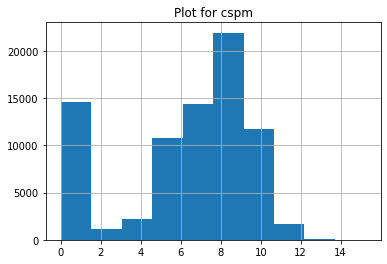

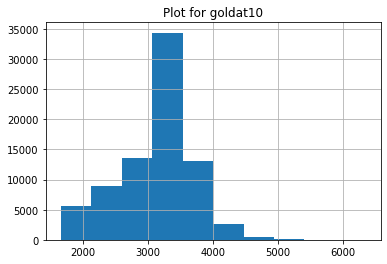

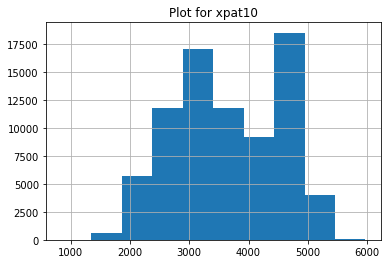

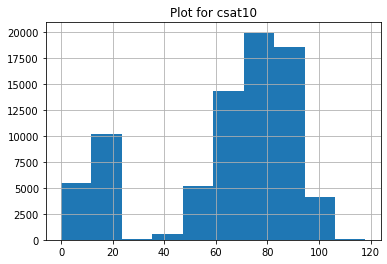

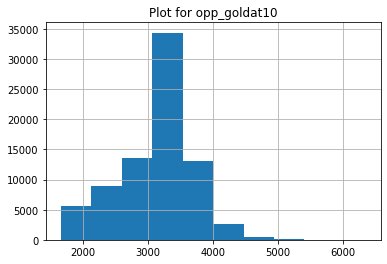

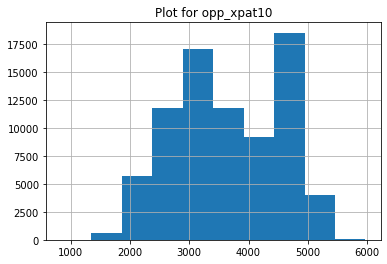

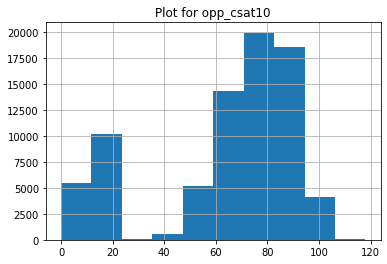

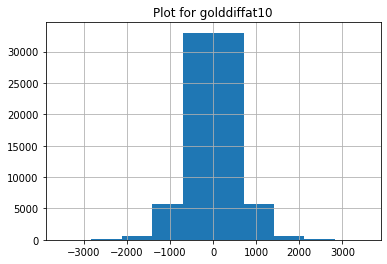

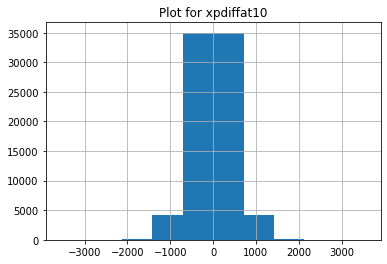

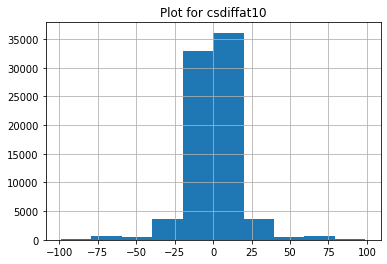

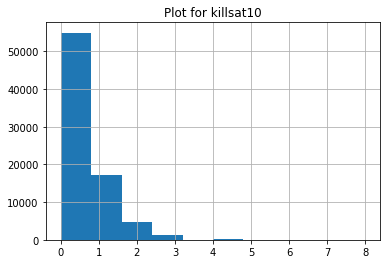

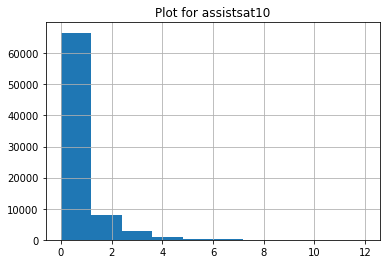

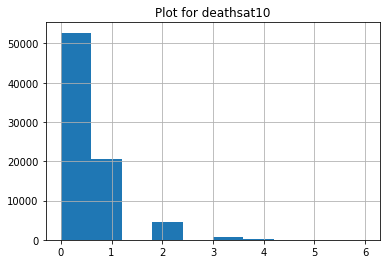

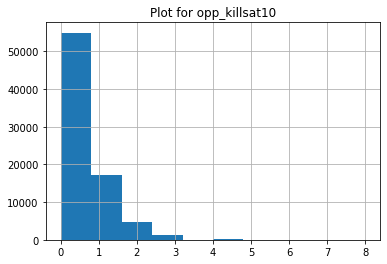

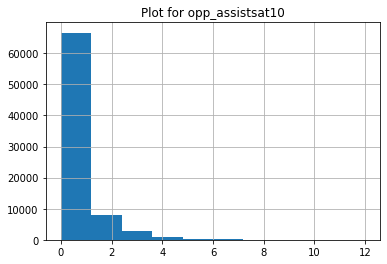

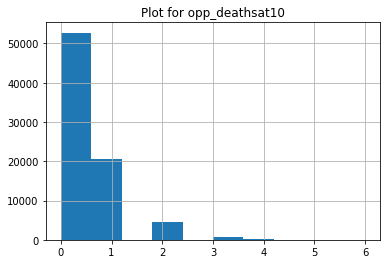

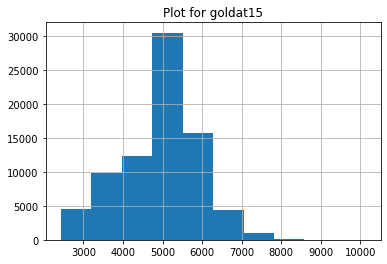

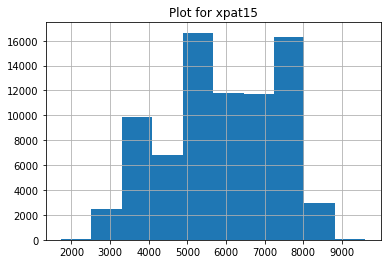

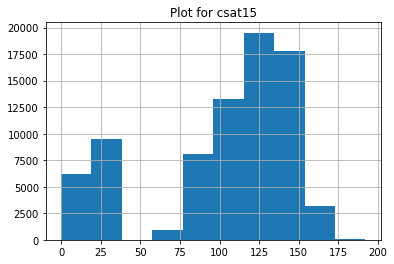

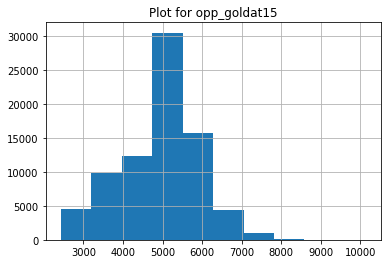

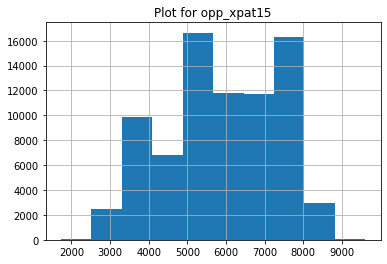

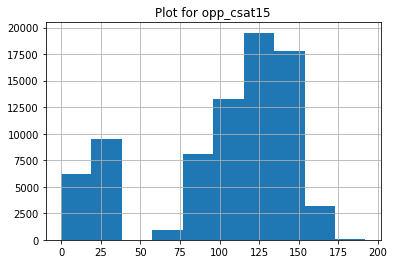

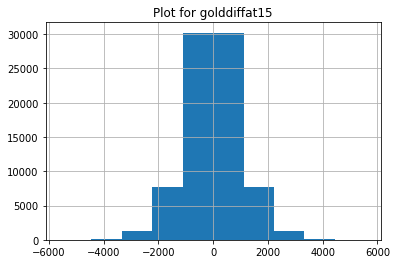

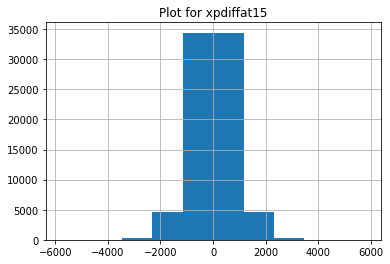

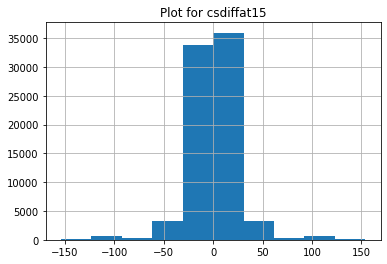

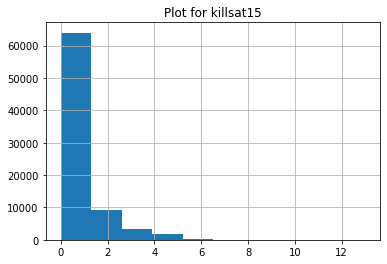

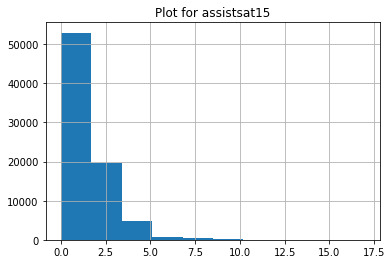

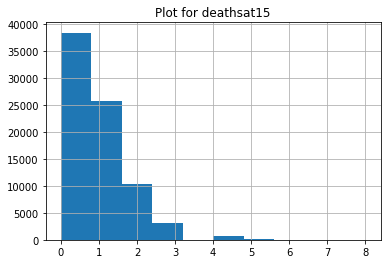

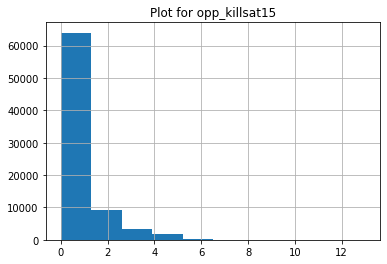

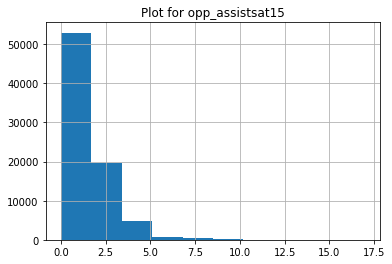

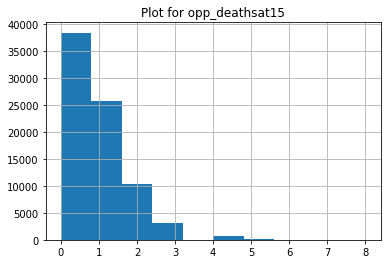

In [88]:
# histogram
for name in player_data_copy.describe().columns:
    player_data_copy[name].hist()
    plt.title(f"Plot for {name}")
    plt.show()

In [104]:
# drop gspd
player_data_copy = player_data_copy.drop(["gspd"], axis=1)

In [106]:
data_len = len(player_data_copy.describe().columns)
print(data_len)

79


### Learn subplots
https://stackoverflow.com/questions/61443444/two-column-subplot-using-matplotlib-and-seaborn

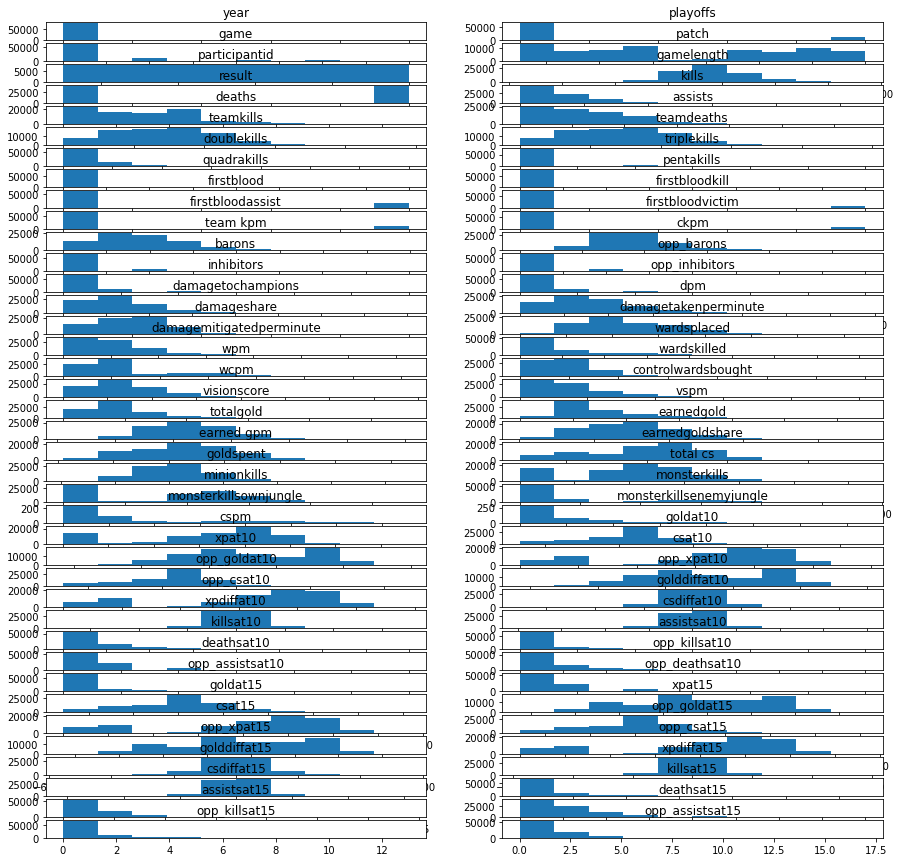

In [111]:
ncols = 2
nrows = data_len // ncols

continuous_features = player_data_copy.describe().columns
fig, ax = plt.subplots(nrows, ncols)
ax=ax.ravel()
for idx, a in enumerate(ax):
    fig.set_figheight(15)
    fig.set_figwidth(15)
    a.hist(player_data_copy[continuous_features[idx]])
    a.set_title(continuous_features[idx])
plt.tight_layout()


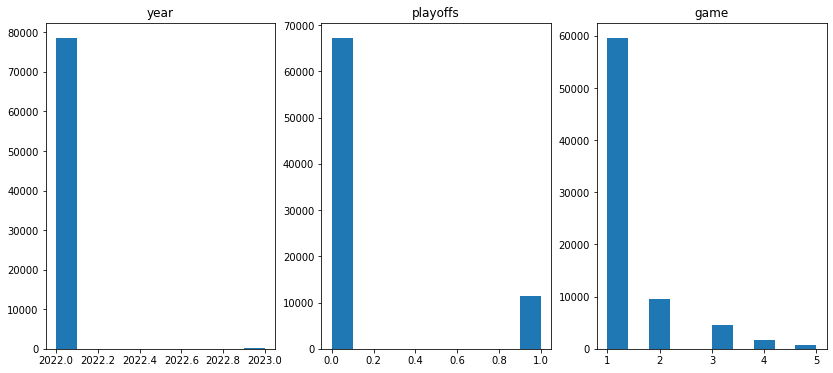

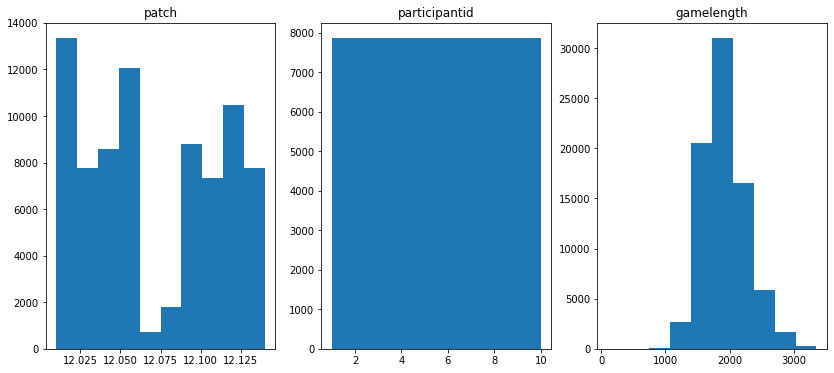

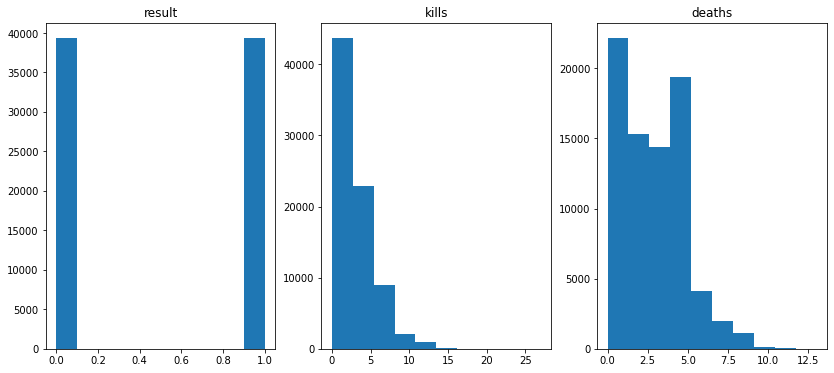

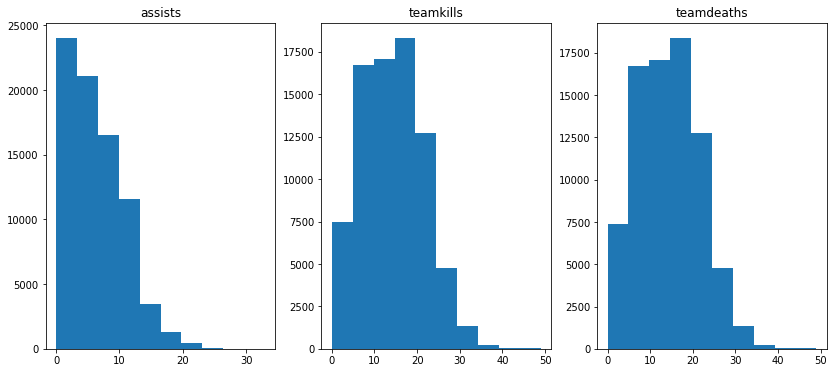

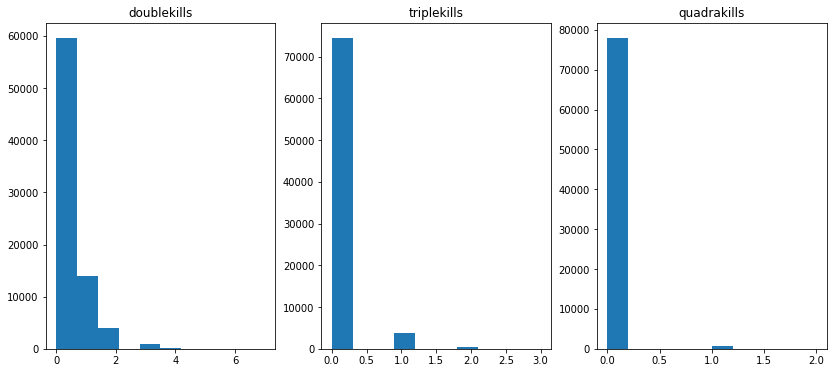

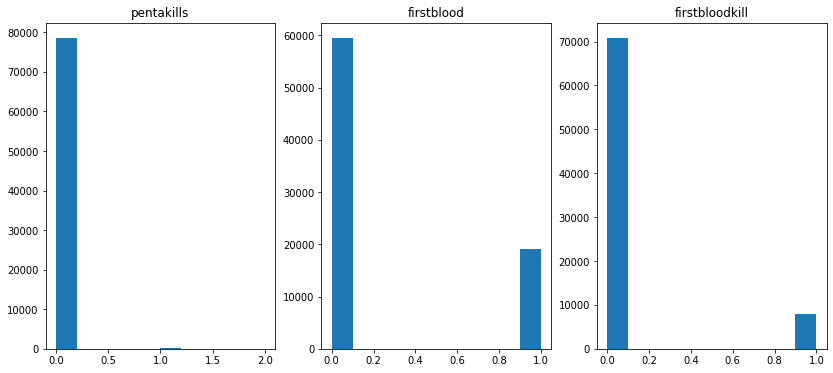

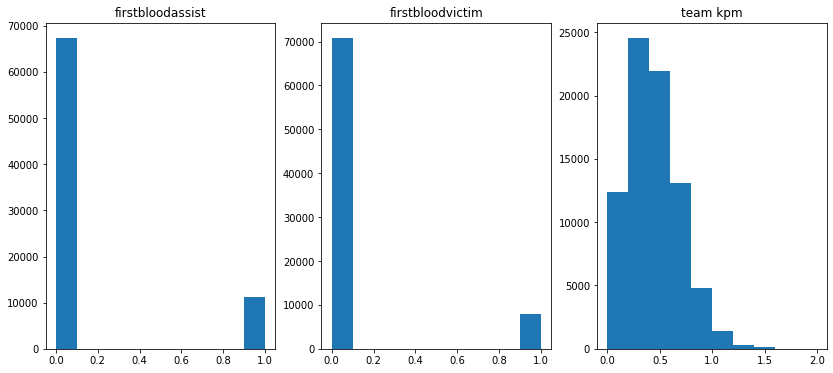

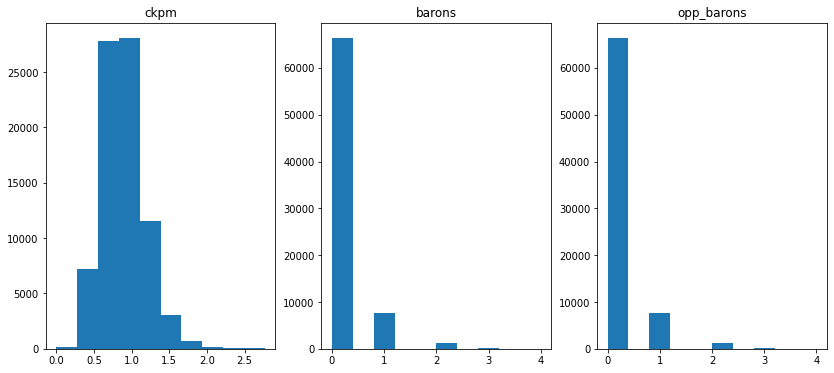

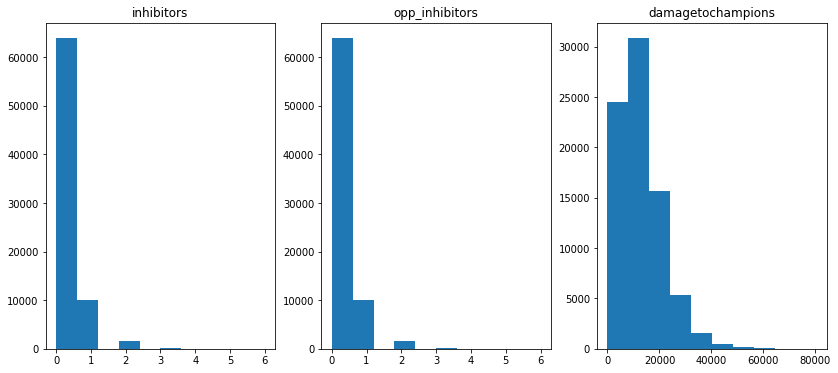

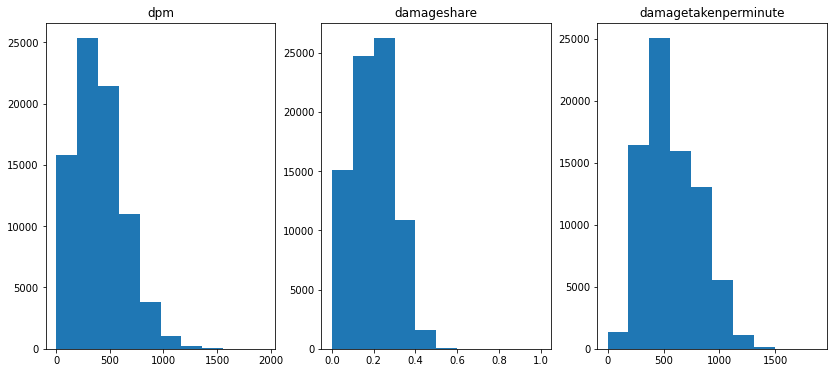

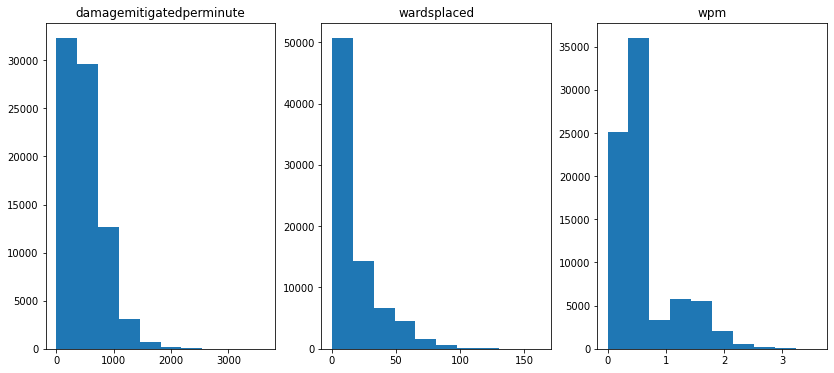

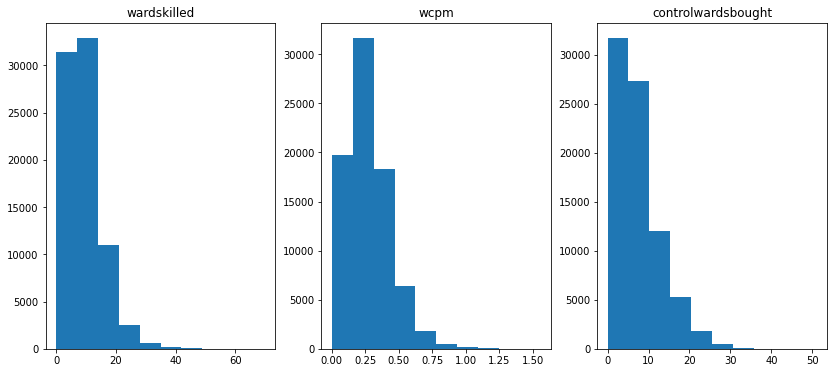

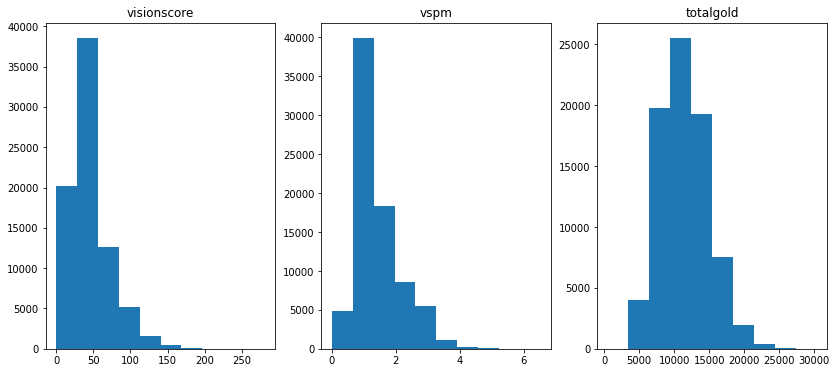

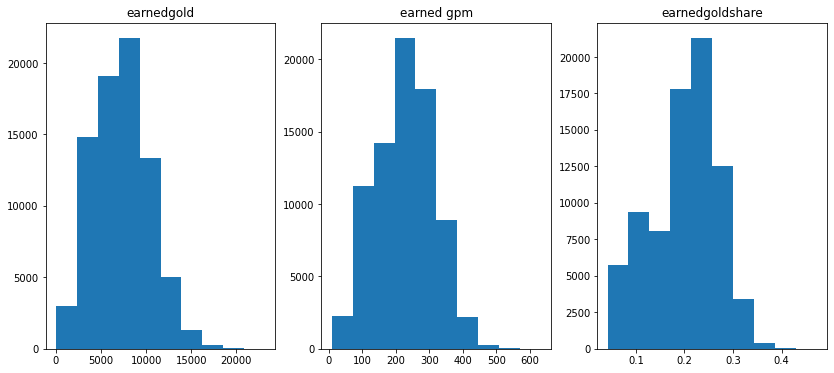

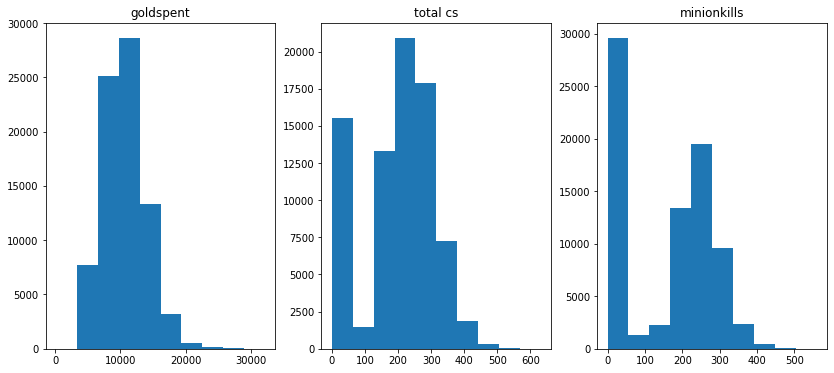

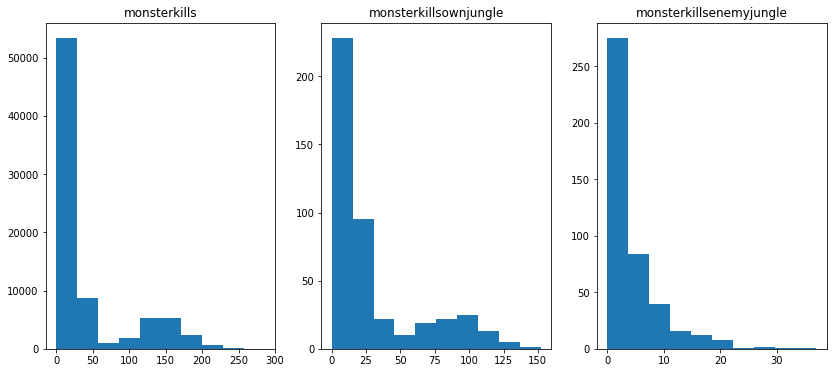

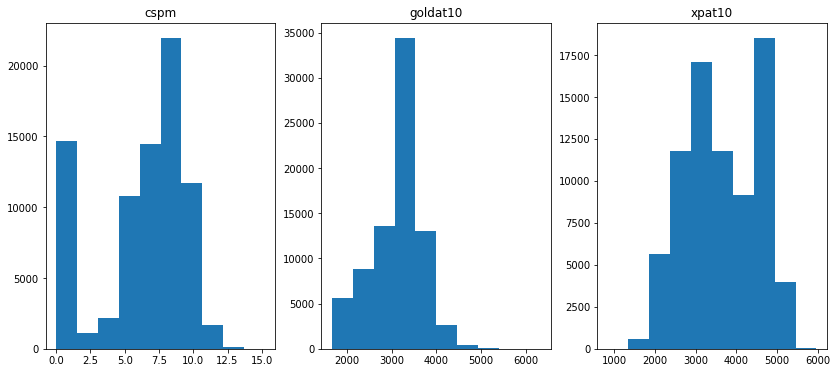

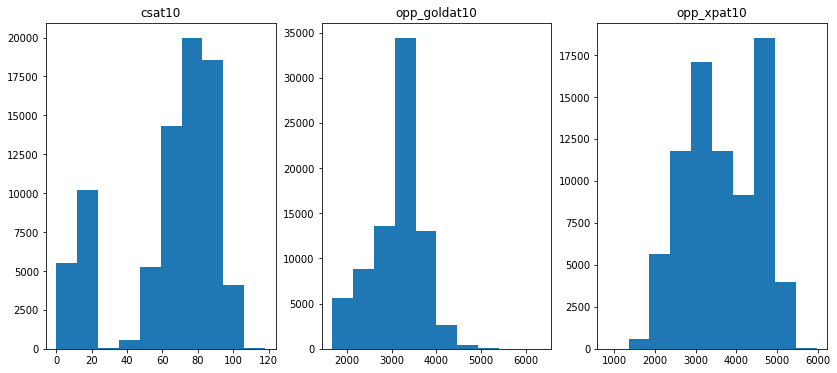

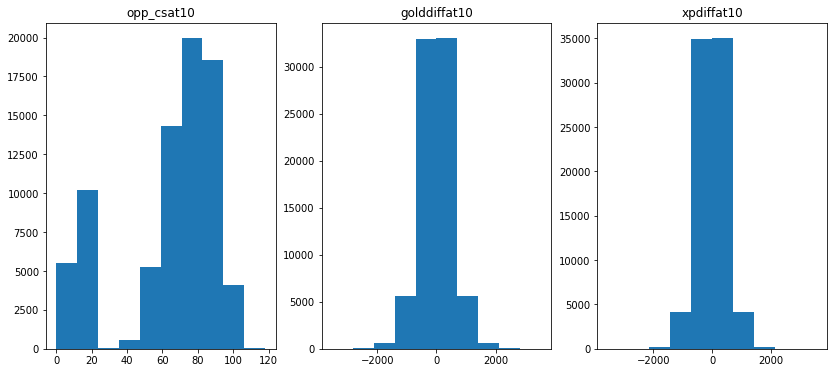

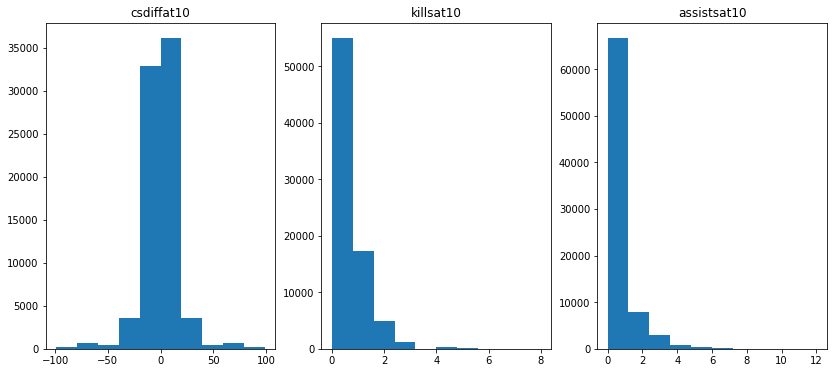

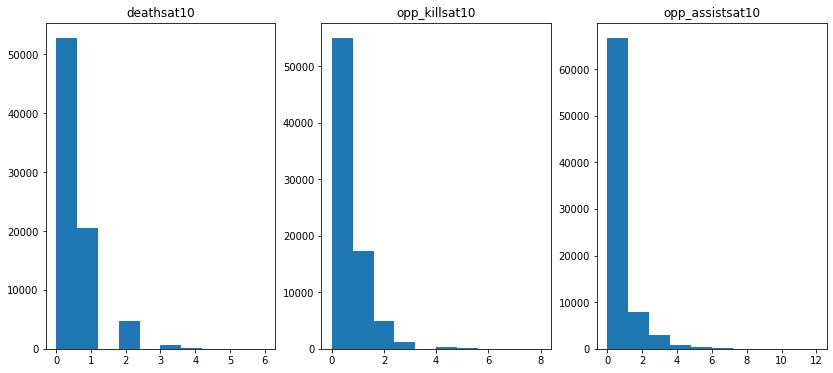

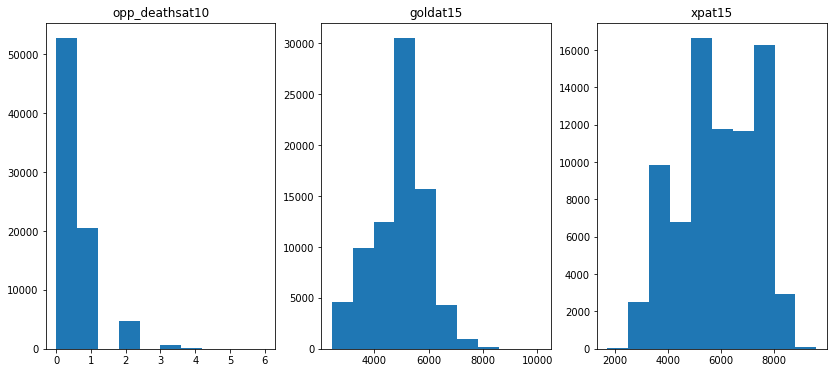

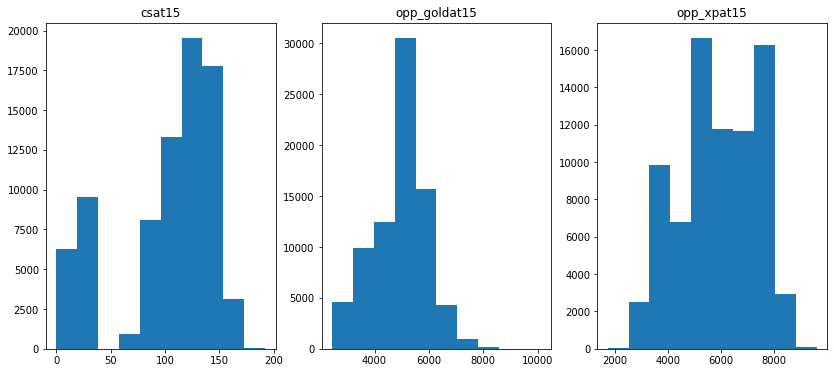

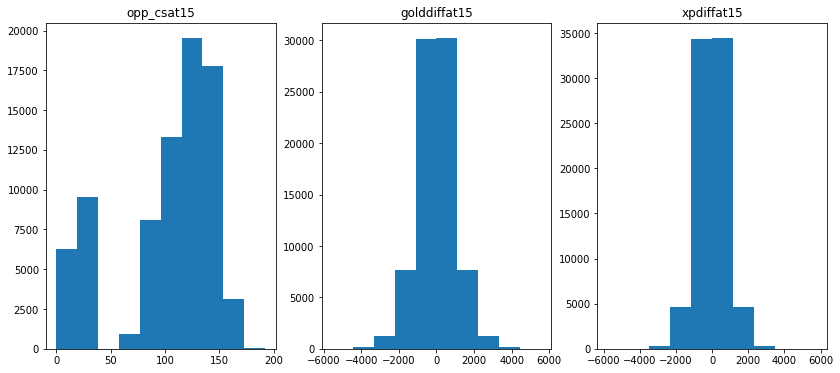

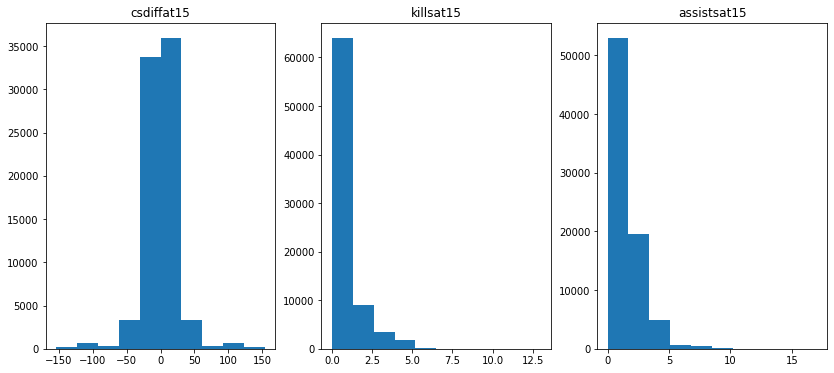

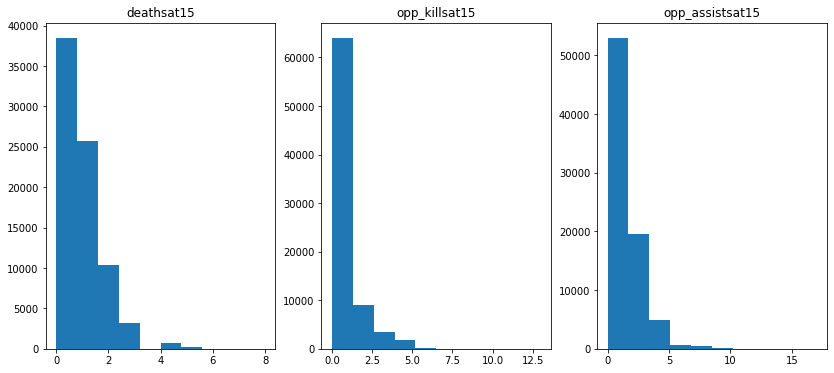

In [130]:

for i in range(0, len(continuous_features)-2, 3):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_figheight(6)
    fig.set_figwidth(14)
    ax1.hist(player_data_copy[continuous_features[i]])
    ax1.set_title(continuous_features[i])

    ax2.hist(player_data_copy[continuous_features[i+1]])
    ax2.set_title(continuous_features[i+1])

    ax3.hist(player_data_copy[continuous_features[i+2]])
    ax3.set_title(continuous_features[i+2])
    # plt.tight_layout()



# Find correlation between match result and all the other features

In [134]:
player_data_copy["result"].corr(player_data_copy["firstblood"])


0.12038971010327426

In [143]:
map_features = {}
for fname in player_data_copy.describe().columns:
    correlation = player_data_copy["result"].corr(player_data_copy[fname])
    map_features[fname] = correlation


In [149]:
from collections import OrderedDict
map_f = OrderedDict(sorted(map_features.items(), key=lambda x:x[1], reverse=True))


In [151]:
corr_df = pd.DataFrame(map_f.items(), columns=["Feature Name", "Correlation"])

In [152]:
corr_df.head(10)

,Feature Name,Correlation
0,result,1.000000
1,team kpm,0.688652
2,teamkills,0.683518
3,assists,0.548689
4,earned gpm,0.378764
5,kills,0.372436
6,inhibitors,0.347912
7,golddiffat15,0.324802
8,earnedgold,0.321536
9,totalgold,0.289896
